<a href="https://colab.research.google.com/github/JossefaRodriguez/Proyecto2-_Parte-II-Core-/blob/main/CORE8_dataset1Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Análisis Inicial y Selección de Problema

## Búsqueda de Conjuntos de Datos

In [95]:
# Importar librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import optuna

In [2]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE8/concrete_data_.csv"
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


- Se utilizará el datset Concrete Compressive Strength Dataset
- Fuente: Kaggle – Elikplim
- Tamaño: 1,030 registros, 9 columnas
- Variables:
    Cement, Water, Superplasticizer, Fly Ash, Coarse Aggregate, Fine Aggregate, Age: edad del concreto, Concrete compressive strength: resistencia en MPa (variable objetivo)

In [5]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate_                1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Análisis Exploratorio de Datos (EDA) Inicial

In [7]:
# comenzaremos identificando posibles valores nulos
df.isna().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate_,0
age,0
concrete_compressive_strength,0


In [8]:
# verificaremos valores duplicados dentro del dataset
df.duplicated().sum()

np.int64(25)

In [9]:
# Se toma una muestra aleatoria del dataset para conocer el comportamiento de algunos datos
df.sample(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate_,age,concrete_compressive_strength
617,254.0,0.0,0.0,198.0,0.0,968.0,863.0,3,9.31
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32
595,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,28,17.60
948,153.1,145.0,113.0,178.5,8.0,867.2,824.0,28,26.23
645,203.5,305.3,0.0,203.5,0.0,963.4,630.0,7,19.54
675,183.9,122.6,0.0,203.5,0.0,959.2,800.0,90,32.53
792,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,360,42.13
767,385.0,0.0,0.0,186.0,0.0,966.0,763.0,28,31.35
128,401.8,94.7,0.0,147.4,11.4,946.8,852.1,28,68.50
485,387.0,20.0,94.0,157.0,14.3,938.0,845.0,28,50.24


In [10]:
# se realizará un analisis estadistico descrptivo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate_,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Algunos componentes como Fly Ash, blast_furnace_Slag y Superplasticizer tienen varios valores en cero, indicando que no siempre se utilizan en la mezcla.

Las proporciones de los ingredientes varían mucho entre muestras.

La resistencia del concreto (Concrete compressive strength) tiene una gran dispersión, lo que podría generar valores extremos.

In [11]:
# Se identificaran posibles valores atipicos en la variable concrete_compressive_strength según lo visualizado en la descripcion estaditica
Q1 = df['concrete_compressive_strength'].quantile(0.25) # se calcula quartil 1
Q3 = df['concrete_compressive_strength'].quantile(0.75) # Se calcula cuartil 3
IQR = Q3 - Q1 # Se calcula el intercuartilico
atipicos = df[(df['concrete_compressive_strength'] < Q1 - 1.5 * IQR) | (df['concrete_compressive_strength'] > Q3 + 1.5 * IQR)]
atipicos

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate_,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75


Se identificaron valores atípicos en la variable objetivo Concrete compressive strength, los cuales corresponden a muestras con resistencias muy superiores al promedio. Estos casos extremos pueden representar mezclas altamente optimizadas o datos fuera del comportamiento habitual, y deben evaluarse cuidadosamente.

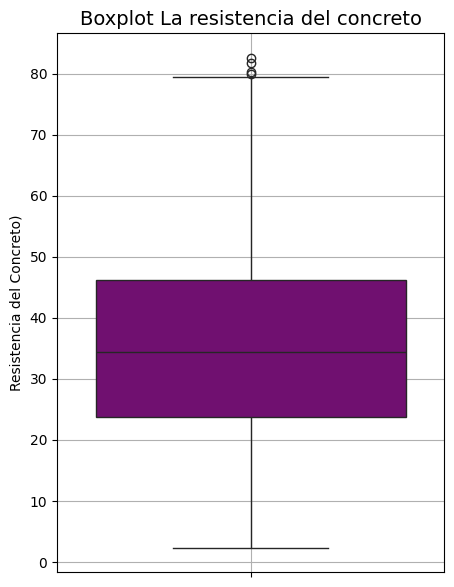

In [12]:
# Se generará grafico para hacer mas visual los valores atipicos en la distribucion de la variable concrete_compressive_strength
plt.figure(figsize=(5, 7))
sns.boxplot(y=df['concrete_compressive_strength'], color='purple')
plt.title('Boxplot La resistencia del concreto', fontsize=14)
plt.ylabel('Resistencia del Concreto)')
plt.grid(True)
plt.show()

En este grafico podemoos visualizar la presencia de varios valores atípicos en la resistencia del concreto (Concrete compressive strength), ubicados por encima del rango superior. Estos casos corresponden a mezclas con resistencia excepcionalmente alta, lo que podría afectar el desempeño de modelos de regresión si no se tratan adecuadamente.

#### Conclusion de los valores atipicos
Para el caso de estos valores atipicos, se probará el eliminado a find e reducir el impacto de los datos a la mismaa esclala


In [13]:
# Eliminaremos los valores atipicos
Q1 = df['concrete_compressive_strength'].quantile(0.25)
Q3 = df['concrete_compressive_strength'].quantile(0.75)
IQR = Q3 - Q1

# Definiremos los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtraremos los datos dentro del rango permitido
df = df[(df['concrete_compressive_strength'] >= limite_inferior) & (df['concrete_compressive_strength'] <= limite_superior)]

<Axes: ylabel='concrete_compressive_strength'>

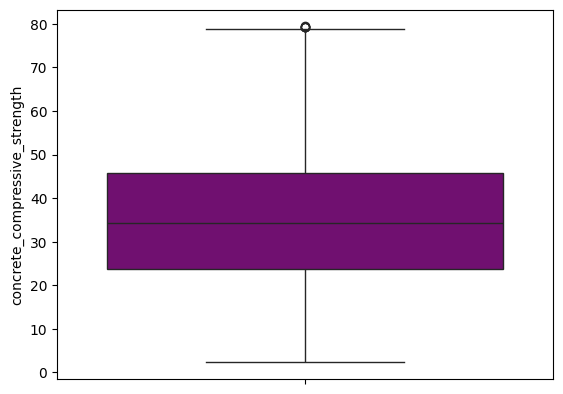

In [14]:
# Se verifica si quedaron fuera
sns.boxplot(y=df['concrete_compressive_strength'], color='purple')

Se realizará una matriz de correlacion para ver la correlacion que existe entre las variables del dataset

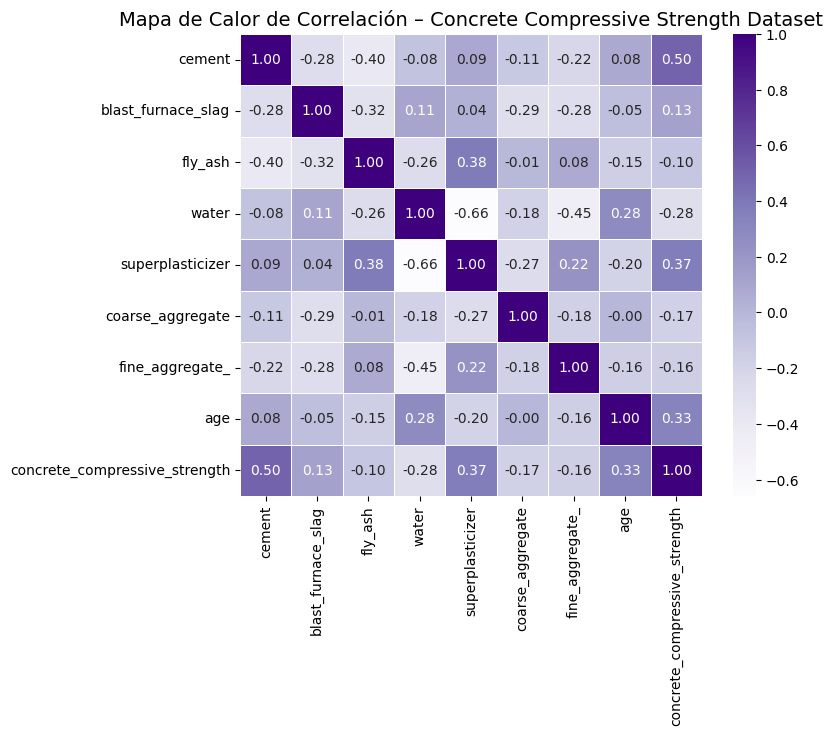

In [15]:
# Se filtran las variables numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación sólo con variables numéricas
matriz_correlacion = df_numerico.corr()

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Purples", square=True, linewidths=0.5)
plt.title("Mapa de Calor de Correlación – Concrete Compressive Strength Dataset", fontsize=14)
plt.show()

#### Analisis
- Las variables que más se correlacionan con Concrete compressive strength son:
    Cement (0.50) relación positiva moderada
    Age (0.33) la resistencia aumenta con el tiempo
    Water (correlación negativa) exceso de agua debilita el concreto
- Superplasticizer tiene impacto indirecto al estar relacionada con Water (-0.66), lo que sugiere que ayuda a reducir la cantidad de agua sin perder trabajabilidad.
- Blast Furnace Slag y Fly Ash muestran correlación negativa entre sí (-0.32), lo que indica que podrían usarse como sustitutos.

### Diagnóstico y Selección de Problema

#### Diagnostico
- El dataset contiene ingredientes de mezclas de concreto (cemento, agua, aditivos, agregados) y su edad.
- La variable objetivo Concrete compressive strength es numérica continua y representa la resistencia del material.
- No hay valores nulos ni duplicados, pero se detectaron valores atípicos altos que ya fueron tratados.
- Se observan correlaciones relevantes, como:
- Cement y Age → relación positiva con la resistencia
- Water → relación negativa, exceso de agua debilita la mezcla

#### Selección del problema: Regresión
El objetivo será predecir la resistencia del concreto a partir de los ingredientes y su edad, usando modelos de regresión multivariable que permitan entender y estimar cómo influye cada componente en la calidad del material.

#### Justificación
- Estimar la resistencia del concreto permite tomar decisiones de diseño estructural sin realizar pruebas destructivas. Es útil en ingeniería civil, construcción y control de calidad.
- La relación entre ingredientes y resistencia es no lineal
- Algunas variables tienen valores cero o muy dispersos
-La influencia del tiempo (Age) puede variar según la composición
- Los modelos deben captar interacciones complejas y evitar que los outliers dominen el resultado

##Selección de Técnica de Machine Learning

###Entrenamiento Inicial:

In [16]:
# Se divide la data en features y target
X = df.drop('concrete_compressive_strength', axis=1)
y = df['concrete_compressive_strength']

In [17]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Modelo RandomForestRegressor

In [18]:
pipelin_randomF = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

In [19]:
# Entrenar.
pipelin_randomF.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
# Predecir y medir

y_pred = pipelin_randomF.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 4.07
R²: 0.93


####Modelo KNN

In [21]:
# Definición del pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

In [22]:
# Entrenamiento y predicción
pipeline_knn.fit(X_train, y_train)
y_pred = pipeline_knn.predict(X_test)

In [23]:
# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 8.92
R²: 0.64


####Modelo Regresion Lineal

In [24]:
# Definición del pipeline
pipeline_rl = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

In [25]:
# Entrenamiento y predicción
pipeline_rl.fit(X_train, y_train)
y_pred = pipeline_rl.predict(X_test)

In [26]:
# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 9.92
R²: 0.56


###Evaluación de modelos con validación cruzada

#### RandomForest

In [40]:
# Se crea el pipeline con escalado y modelo utilizado
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('Rf', RandomForestRegressor(random_state=42))
])

In [41]:
# Se aplica el cross_val_scroe para la validacion cruzada con 5 folds(particiion del dataset) y RMSE como la metrica
score_randomF = cross_val_score(pipe_rf, X, y, cv=5, scoring='neg_root_mean_squared_error')


In [42]:
# Se muestra por consola el RMSEprimedio y la desv estandar
print("Random Forest - RMSE promedio:", -score_randomF.mean())
print("Random Forest - Desviación estándar:", score_randomF.std())

Random Forest - RMSE promedio: 10.093682265688837
Random Forest - Desviación estándar: 4.298667532019964


####KNNRegresor

In [32]:
# Se crea el pipeline con escalado y modelo utilizado
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [33]:
# Se aplica el cross_val_scroe para la validacion cruzada con 5 folds(particiion del dataset) y RMSE como la metrica
scores_knn = cross_val_score(pipe_knn, X, y, cv=5, scoring='neg_root_mean_squared_error')

In [34]:
#Se muestra or consola el RMSE promedio y la desviación estandar
print("KNN - RMSE promedio:", -scores_knn.mean())
print("KNN - Desviación estándar:", scores_knn.std())

KNN - RMSE promedio: 12.033250758791558
KNN - Desviación estándar: 1.4033196410318483


####RegresionLineal

In [36]:
# Se crea el pipeline con escalado y modelo utilizado
pipe_rl = Pipeline([
    ('scaler', StandardScaler()),
    ('rl', LinearRegression())
])

In [37]:
# Se aplica el cross_val_scroe para la validacion cruzada con 5 folds(particiion del dataset) y RMSE como la metrica
scores_rl = cross_val_score(pipe_rl, X, y, cv=5, scoring='neg_root_mean_squared_error')


In [38]:
#Se muestra por consola el RMSE promedio y la desviación estandar
print("Regresión Lineal - RMSE promedio:", -scores_rl.mean())
print("Regresión Lineal - Desviación estándar:", scores_rl.std())

Regresión Lineal - RMSE promedio: 10.994165822549224
Regresión Lineal - Desviación estándar: 1.9304840604419327


In [52]:
# Diccionario con resultados para comparar
rmse_dict = {
    'Random Forest': score_randomF,
    'KNN': scores_knn,
    'Regresión Lineal': scores_rl
}

print("RMSE promedio por modelo:")
print("Random Forest:", rmse_dict['Random Forest'])
print("KNN:", rmse_dict['KNN'])
print("Regresión Lineal:", rmse_dict['Regresión Lineal'])

RMSE promedio por modelo:
Random Forest: [ -9.80377296  -8.18918352  -7.78654325  -6.29355932 -18.39535228]
KNN: [-13.97276634 -12.8222988  -11.76108017  -9.71620109 -11.89390739]
Regresión Lineal: [-14.21148878 -11.64011181 -11.07366547  -9.23062529  -8.81493776]


#### Analisis
El randomforest tiene el promedio mas bajo, lo que nos indica que precide con mayor precision pero su rendimiento depende del subconjunto de datos, por la variabilidad en los folds
El knn tiene comportamiento mas consistente pero su RMSE es mas alto
Y por ultimo Regresion lineal tiene un rendimiento intermedio

Respecto al mejor modelo es el Random Forest en cuanto a rendimiento promedio.

### Optimización de Hiperparámetros

#### GridSearchCV

In [55]:
# GridSearchCV para Random Forest

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

parametros_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(pipe_rf, parametros_rf, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_rf.fit(X, y)
print("Random Forest - Mejor RMSE:", -grid_rf.best_score_)

Random Forest - Mejor RMSE: 10.050373811349532


In [57]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__p': [1, 2]
}

grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_knn.fit(X, y)
print("KNN - Mejor RMSE:", -grid_knn.best_score_)

KNN - Mejor RMSE: 11.707309337789239


In [62]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_lr = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_lr = GridSearchCV(pipe_lr, param_lr, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_lr.fit(X, y)
print("Regresión Lineal - Mejor RMSE:", -grid_lr.best_score_)

Regresión Lineal - Mejor RMSE: 10.974700715377132


#### Comparación entre los modelos optimizado por GridSearchCV

In [68]:
mejor_modelo = min([
    ("Random Forest", -grid_rf.best_score_),
    ("KNN", -grid_knn.best_score_),
    ("Regresión Lineal", -grid_lr.best_score_)
], key=lambda x: x[1])

print(f"Mejor modelo optimizado: {mejor_modelo[0]} con RMSE de {mejor_modelo[1]:.2f}")

Mejor modelo optimizado: Random Forest con RMSE de 10.05


####RandomizedSearchCV

In [71]:
# RandomizedSearchCV para Random Forest

param_rf = {
    'rf__n_estimators': [50, 100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

rnd_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_rf, cv=5, n_iter=10, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
rnd_rf.fit(X, y)
print("Mejor RMSE - Random Forest:", -rnd_rf.best_score_)

Mejor RMSE - Random Forest: 10.252341482033344


In [72]:
#  RandomizedSearchCV para KNN Regressor

param_knn = {
    'knn__n_neighbors': range(3, 20),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

rnd_knn = RandomizedSearchCV(pipe_knn, param_distributions=param_knn, cv=5, n_iter=10, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
rnd_knn.fit(X, y)
print("Mejor RMSE - KNN:", -rnd_knn.best_score_)

Mejor RMSE - KNN: 11.568082040446479


In [73]:
#  RandomizedSearchCV para Regresion Lineal

param_lr = {
    'ridge__alpha': np.logspace(-3, 3, 20)  # Valores de regularización entre 0.001 y 1000
}

rnd_lr = RandomizedSearchCV(pipe_lr, param_distributions=param_lr, cv=5, n_iter=10, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
rnd_lr.fit(X, y)
print("Mejor RMSE - Ridge:", -rnd_lr.best_score_)

Mejor RMSE - Ridge: 10.979802168652114


####

####Comparación entre los modelos optimizado por RandomizedSearchCV

In [74]:
mejor_modelo = min([
    ("Random Forest", -rnd_rf.best_score_),
    ("KNN", -rnd_knn.best_score_),
    ("Regresión Lineal", -rnd_lr.best_score_)
], key=lambda x: x[1])

print(f"Mejor modelo optimizado: {mejor_modelo[0]} con RMSE de {mejor_modelo[1]:.2f}")

Mejor modelo optimizado: Random Forest con RMSE de 10.25


####Optuna

In [83]:
# Optuna con Random Forest

# Se crea el estudio
estudio_rf = optuna.create_study(direction='minimize')

# Se define labusqueda manual
def ejecutar_trial(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)

    modelo_rfO = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,random_state=42
        ))
    ])

    puntajes = cross_val_score(modelo_rfO, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse_promedio = -puntajes.mean()
    return rmse_promedio

# Se ejecuta la optimización paso a paso
estudio_rf.optimize(ejecutar_trial, n_trials=50)

# Se muestran resultados
print("Mejor RMSE:", estudio_rf.best_value)
print("Mejores parámetros:", estudio_rf.best_params)

[I 2025-07-22 21:44:36,987] A new study created in memory with name: no-name-c307b72f-2d7f-4357-9f2b-0f2a5a61e946
[I 2025-07-22 21:44:40,207] Trial 0 finished with value: 10.861619150019488 and parameters: {'n_estimators': 190, 'max_depth': 6}. Best is trial 0 with value: 10.861619150019488.
[I 2025-07-22 21:44:45,721] Trial 1 finished with value: 10.098616531490062 and parameters: {'n_estimators': 228, 'max_depth': 13}. Best is trial 1 with value: 10.098616531490062.
[I 2025-07-22 21:44:47,976] Trial 2 finished with value: 10.071491947292987 and parameters: {'n_estimators': 60, 'max_depth': 28}. Best is trial 2 with value: 10.071491947292987.
[I 2025-07-22 21:44:58,191] Trial 3 finished with value: 10.081048198897514 and parameters: {'n_estimators': 266, 'max_depth': 21}. Best is trial 2 with value: 10.071491947292987.
[I 2025-07-22 21:45:00,267] Trial 4 finished with value: 10.10339536776711 and parameters: {'n_estimators': 88, 'max_depth': 22}. Best is trial 2 with value: 10.0714919

Mejor RMSE: 10.006026115808968
Mejores parámetros: {'n_estimators': 140, 'max_depth': 15}


In [79]:
# Optuna con KNN Regressor

# Se crea estudio
estudio_knn = optuna.create_study(direction='minimize')

# Se define y evalua directo
def ejecutar_trial_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)

    modelo = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        ))
    ])
    puntajes = cross_val_score(modelo, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse_prom = -puntajes.mean()
    return rmse_prom

# Se ejecuta paso a paso
estudio_knn.optimize(ejecutar_trial_knn, n_trials=50)

# Se muestran los resultados
print("🎯 KNN - Mejor RMSE:", estudio_knn.best_value)
print("🔧 Mejores parámetros:", estudio_knn.best_params)

[I 2025-07-22 21:39:19,728] A new study created in memory with name: no-name-b280b5b0-9ab9-4936-8314-4fd1ad374629
[I 2025-07-22 21:39:19,786] Trial 0 finished with value: 12.022120423357427 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 12.022120423357427.
[I 2025-07-22 21:39:19,839] Trial 1 finished with value: 11.919662983278105 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 11.919662983278105.
[I 2025-07-22 21:39:19,895] Trial 2 finished with value: 12.090325045980526 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 11.919662983278105.
[I 2025-07-22 21:39:19,957] Trial 3 finished with value: 11.876776328605338 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 11.876776328605338.
[I 2025-07-22 21:39:20,015] Trial 4 finished with value: 11.529305584128924 and parameters: {'n_neighbors': 11, 'weights': 

🎯 KNN - Mejor RMSE: 11.46242019128753
🔧 Mejores parámetros: {'n_neighbors': 8, 'weights': 'distance', 'p': 1}


In [80]:
# Optuna con Regresion Lineal

# Se crear estudio
estudio_lr = optuna.create_study(direction='minimize')

# Se define  y evalua directamente con LinearRegression
def ejecutar_trial_lr(trial):
    modelo_rlO = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])
    puntajes = cross_val_score(modelo_rlO, X, y, cv=5, scoring='neg_root_mean_squared_error')
    return -puntajes.mean()

# Se ejecutar optimización
estudio_lr.optimize(ejecutar_trial_lr, n_trials=1)

# Se muestran los resultados
print("RMSE promedio con LinearRegression:", estudio_lr.best_value)

[I 2025-07-22 21:39:27,221] A new study created in memory with name: no-name-f4e996ab-51b1-4353-869a-8623cdc512be
[I 2025-07-22 21:39:27,261] Trial 0 finished with value: 10.994165822549224 and parameters: {}. Best is trial 0 with value: 10.994165822549224.


RMSE promedio con LinearRegression: 10.994165822549224


##Evaluación de Modelos Optimizados

In [92]:
# Se elige el mejor modelo que fue Random Forest

modelo_rf_opt = RandomForestRegressor(
    n_estimators=estudio_rf.best_params['n_estimators'],
    max_depth=estudio_rf.best_params['max_depth'],
    random_state=42
)

modelo_rf_opt.fit(X_train, y_train)
y_pred_opt = modelo_rf_opt.predict(X_test)

In [94]:
# Optimizado
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
r2_opt = r2_score(y_test, y_pred_opt)

# Inicial
rmse_inicial = np.sqrt(mean_squared_error(y_test, y_pred))
r2_inicial = r2_score(y_test, y_pred)

print("🔍 Comparativa de rendimiento:")
print(f"Optimizado - RMSE: {rmse_opt:.2f} | R²: {r2_opt:.2f}")
print(f"Inicial    - RMSE: {rmse_inicial:.2f} | R²: {r2_inicial:.2f}")

🔍 Comparativa de rendimiento:
Optimizado - RMSE: 4.06 | R²: 0.93
Inicial    - RMSE: 9.92 | R²: 0.56


## Conslusion

El R² subió de 0.56 a 0.93, lo que significa que ahora el modelo explica el 93% de la variabilidad de la resistencia del concreto. Esto representa un gran salto en calidad de ajuste.

La mejora proviene del ajuste fino de n_estimators, max_depth, y otros hiperparámetros que permitieron al modelo capturar mejor las relaciones no lineales entre ingredientes y resistencia.

El modelo optimizado con Random Forest y Optuna es claramente superior en precisión y capacidad de generalización tanto por rendimiento como por su robustez en validación cruzada.